In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Import dataset in csv format

In [3]:
dataset=pd.read_csv("dataset/StudentsPerformance.csv")

In [4]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
dataset.shape

(1000, 8)

1. check missing values
2. check duplicate datas
3. check datatypes
4. check the number of unique values in each columns
5. statistics of dataset
6. check the categories in each columns

1. check for missing values

In [6]:
dataset.isna().sum()

#there is no missing values in dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

2. check for duplicates

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
dataset.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
#define numerical and categorical columns
numeric_features =[feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features= [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

#print the output
print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("\nWe have {} categorical : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Add 2 columns "total score" and "avg score"

In [13]:
dataset["total_score"]= dataset["math score"]+dataset["reading score"]+dataset["writing score"]
dataset["avg_score"]= (dataset["total_score"])/3

dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
#finding the number of students with full marks
reading_full = dataset[dataset["reading score"]==100]['avg_score'].count()
writing_full = dataset[dataset["writing score"]==100]['avg_score'].count()
math_full = dataset[dataset["math score"]==100]['avg_score'].count()

print(f' Number of students with full marks in math {math_full}')
print(f' Number of students with full marks in writing {writing_full}')
print(f' Number of students with full marks in reading {reading_full}')

 Number of students with full marks in math 7
 Number of students with full marks in writing 14
 Number of students with full marks in reading 17


In [16]:
#finding the number of students with less than 20 marks
reading_less_than20 = dataset[dataset["reading score"]<=20]['avg_score'].count()
writing_less_than20 = dataset[dataset["writing score"]<=20]['avg_score'].count()
math_less_than20 = dataset[dataset["math score"]<=20]['avg_score'].count()

print(f' Number of students with less marks in math {math_less_than20}')
print(f' Number of students with less marks in writing {writing_less_than20}')
print(f' Number of students with less marks in reading {reading_less_than20}')

 Number of students with less marks in math 4
 Number of students with less marks in writing 3
 Number of students with less marks in reading 1


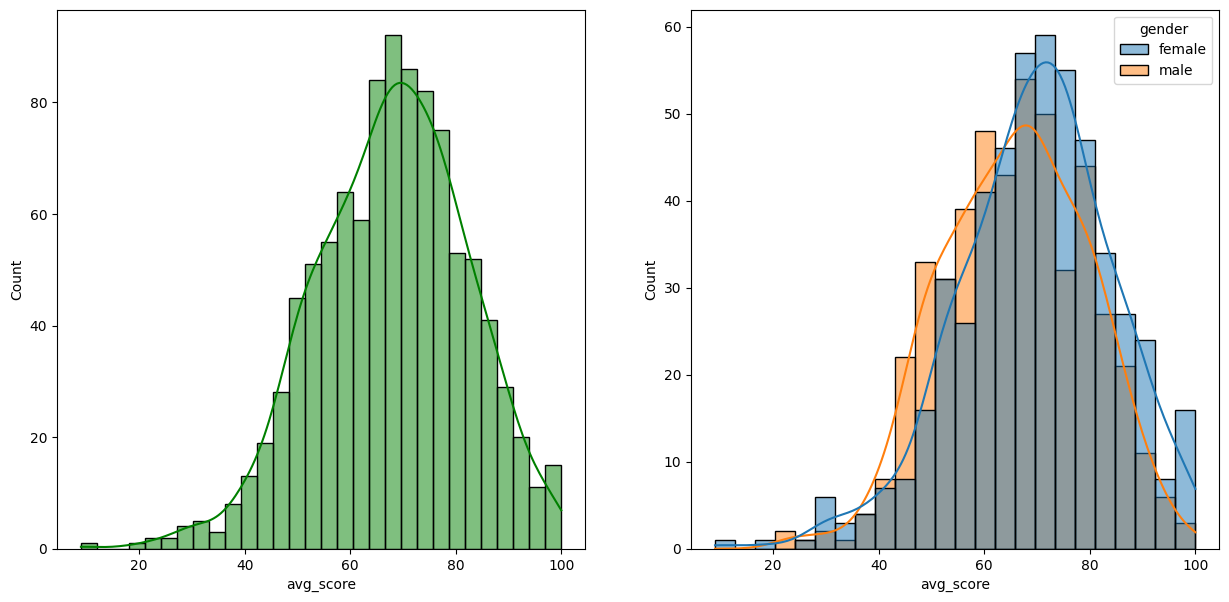

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='avg_score',kde=True,hue='gender')
plt.show()

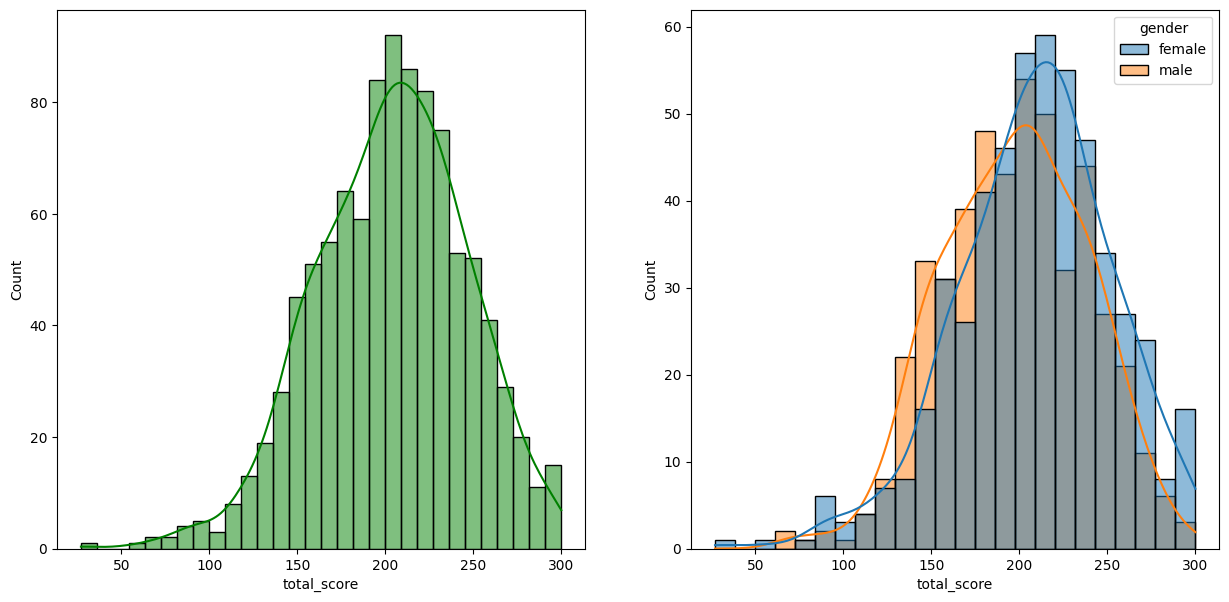

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='total_score',kde=True,hue='gender')
plt.show()

Insights

-- Standard lunch helps perform well in exams

-- Standard lunch helps perform well in exams be it a male or a female.

Maximumum score of students in all three subjects

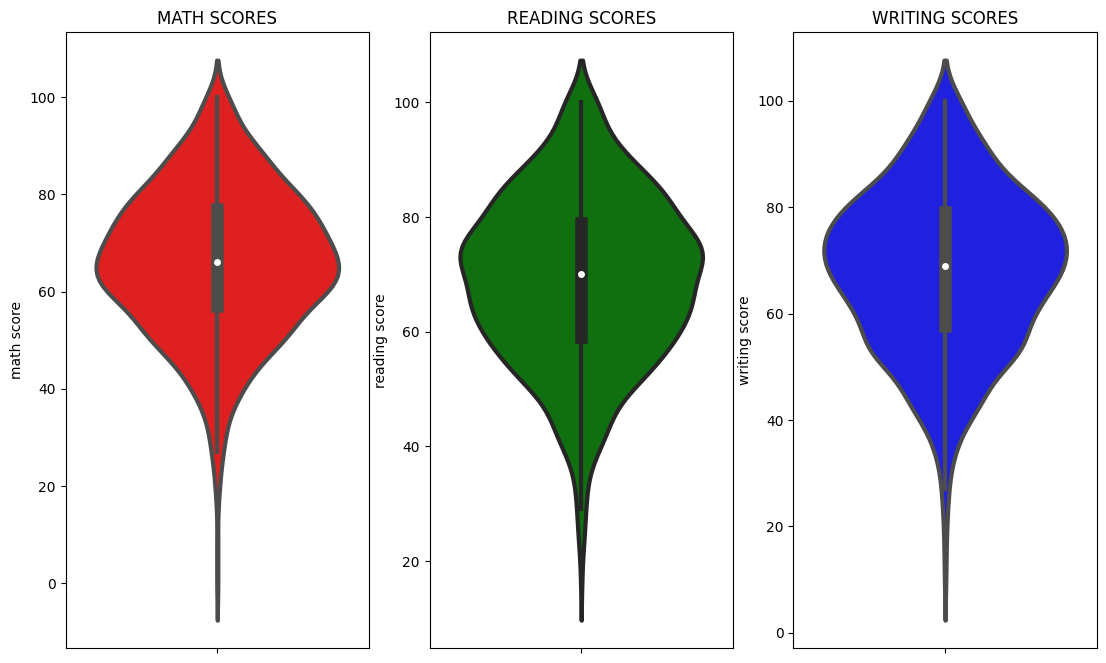

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=dataset,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=dataset,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=dataset,color='blue',linewidth=3)
plt.show()

Multivariate analysis

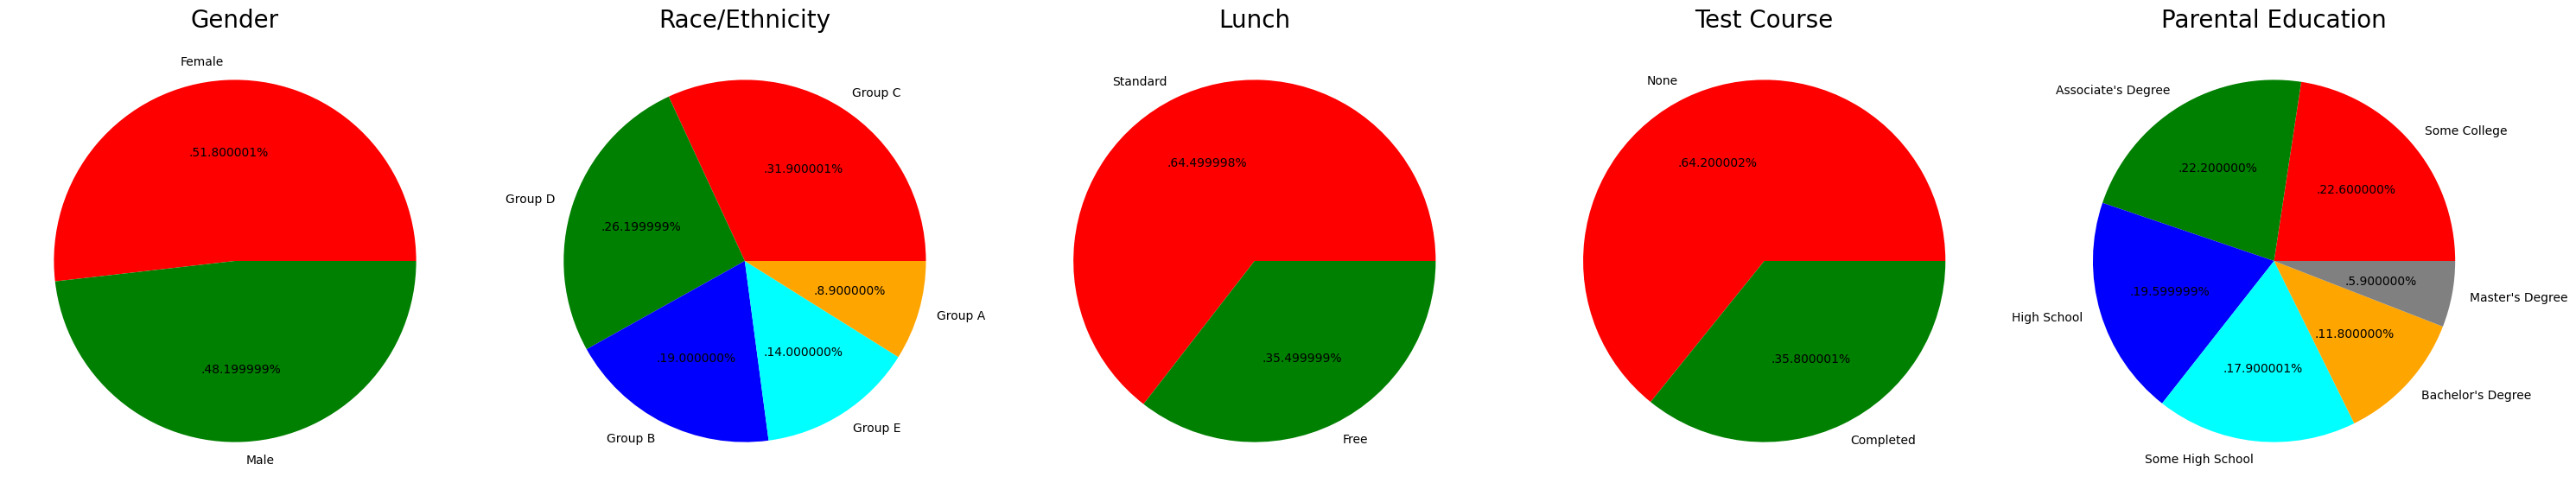

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = dataset['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = dataset['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = dataset['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = dataset['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = dataset['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

from the above figures

* Number of Male and Female students is almost equal

* Number students are greatest in Group C

* Number of students who have standard lunch are greater

* Number of students who have not enrolled in any test preparation course is greater

* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Is gender has any impact on student's performance ?

In [21]:
gender_group = dataset.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total_score,avg_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


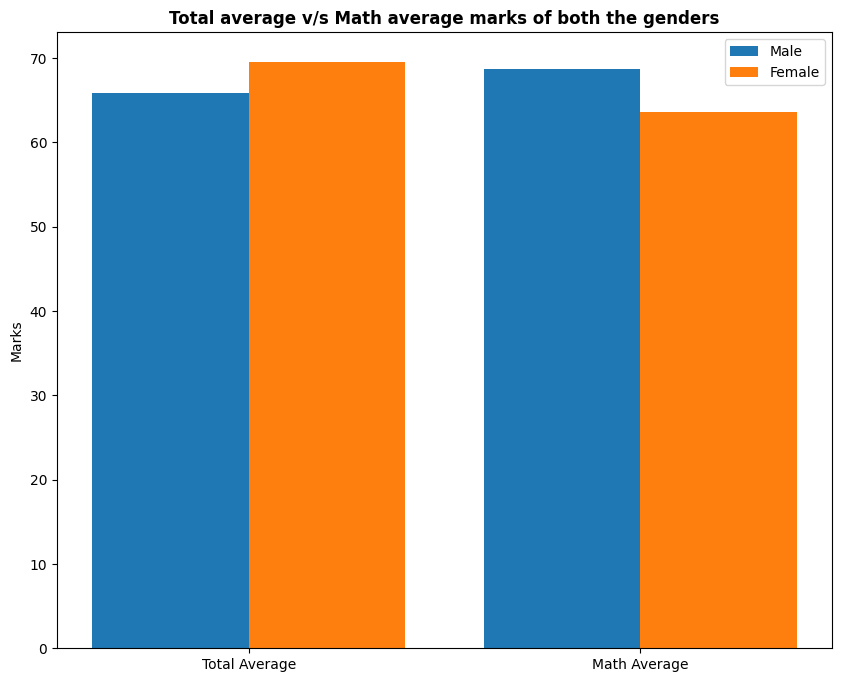

In [22]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

* Is Race/Ehnicity has any impact on student's performance ?

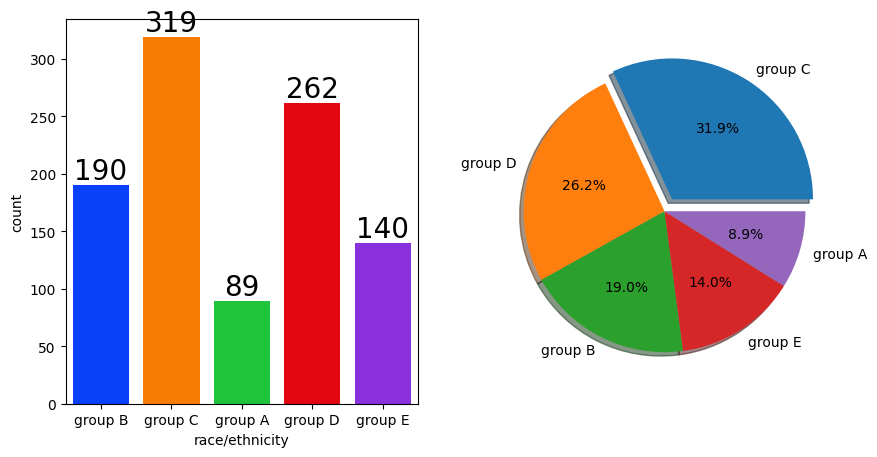

In [23]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=dataset['race/ethnicity'],data=dataset,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = dataset['race/ethnicity'].value_counts(),labels=dataset['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

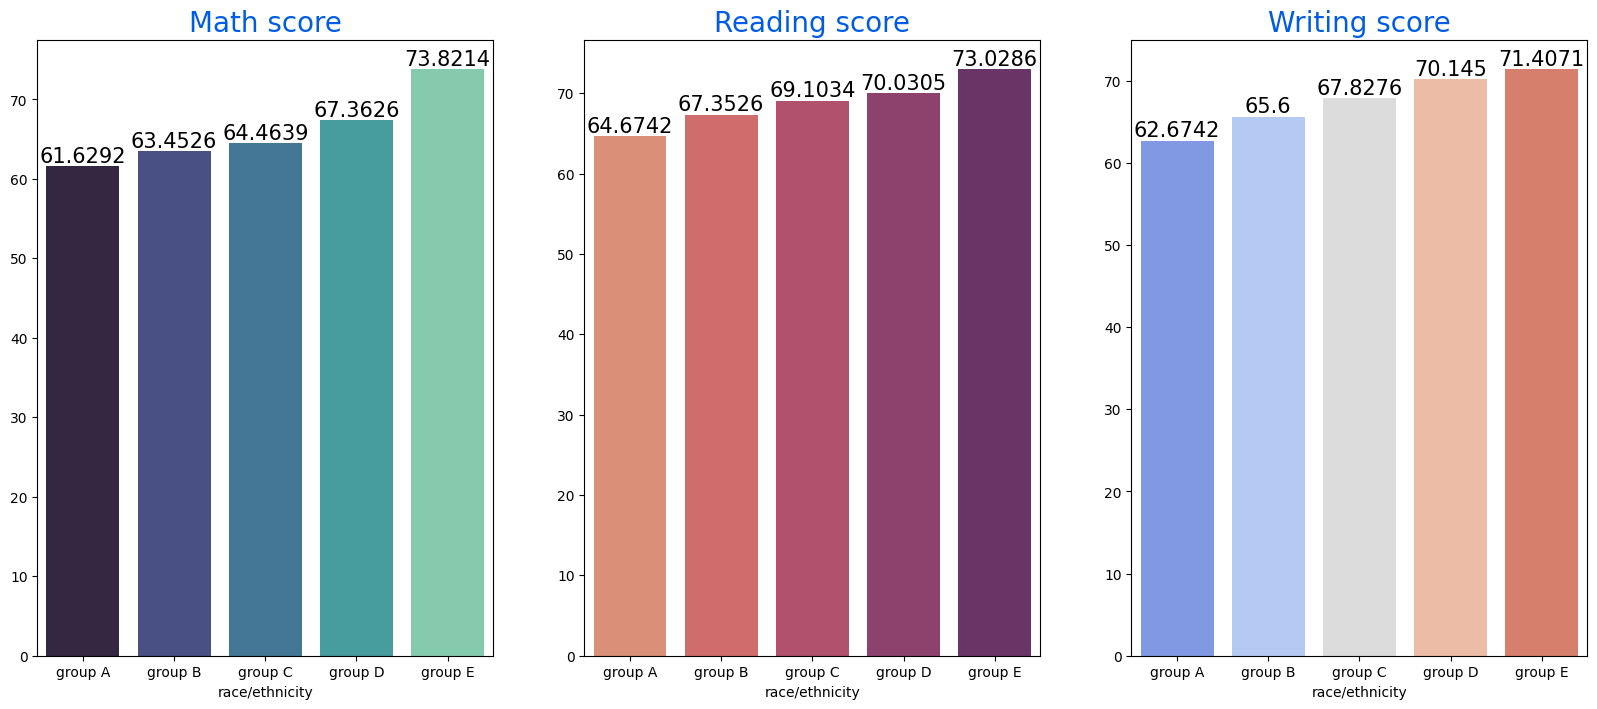

In [24]:
Group_data2=dataset.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

* Is parental education has any impact on student's performance ?

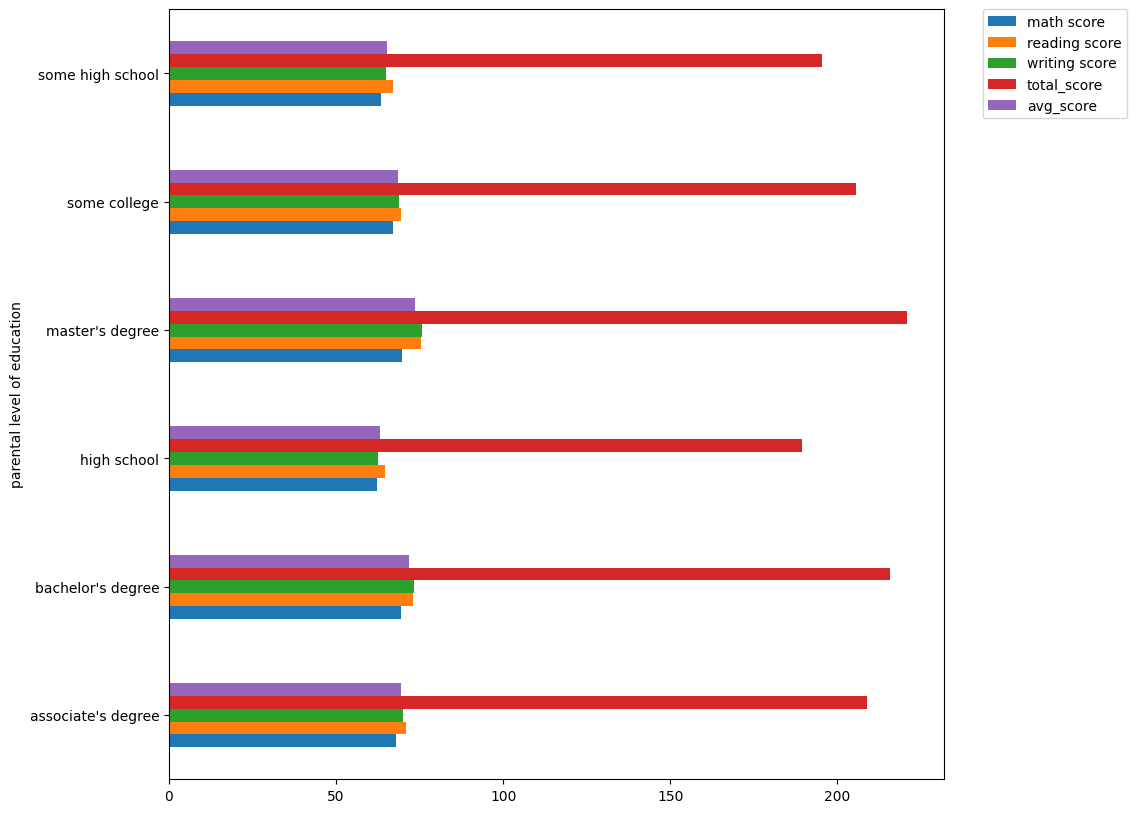

In [25]:

dataset.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

insight

* The score of student whose parents possess master and bachelor level education are higher than others.

* Which type of lunch is most common amoung students ?

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   avg_score                    1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


*  Is Test prepration course has any impact on student's performance ? 

<Axes: xlabel='lunch', ylabel='writing score'>

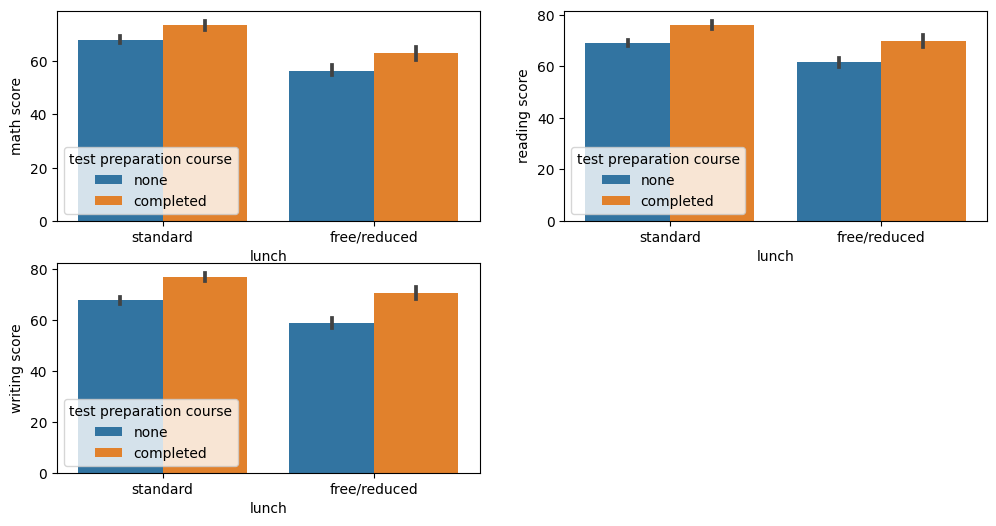

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=dataset['lunch'], y=dataset['math score'], hue=dataset['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=dataset['lunch'], y=dataset['reading score'], hue=dataset['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=dataset['lunch'], y=dataset['writing score'], hue=dataset['test preparation course'])

* CHECKING OUTLIERS

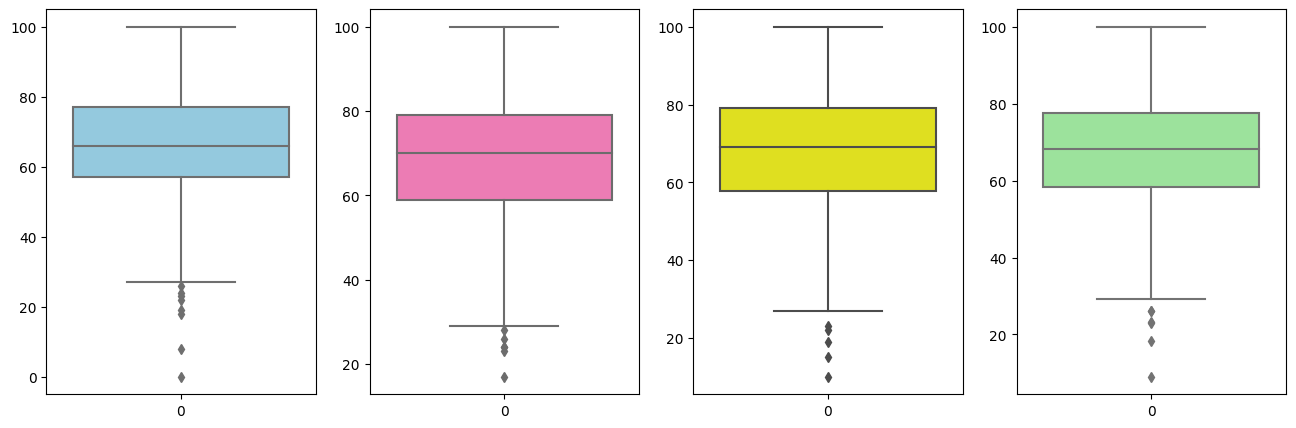

In [28]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dataset['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(dataset['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(dataset['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(dataset['avg_score'],color='lightgreen')
plt.show()

*  MUTIVARIATE ANALYSIS USING PAIRPLOT

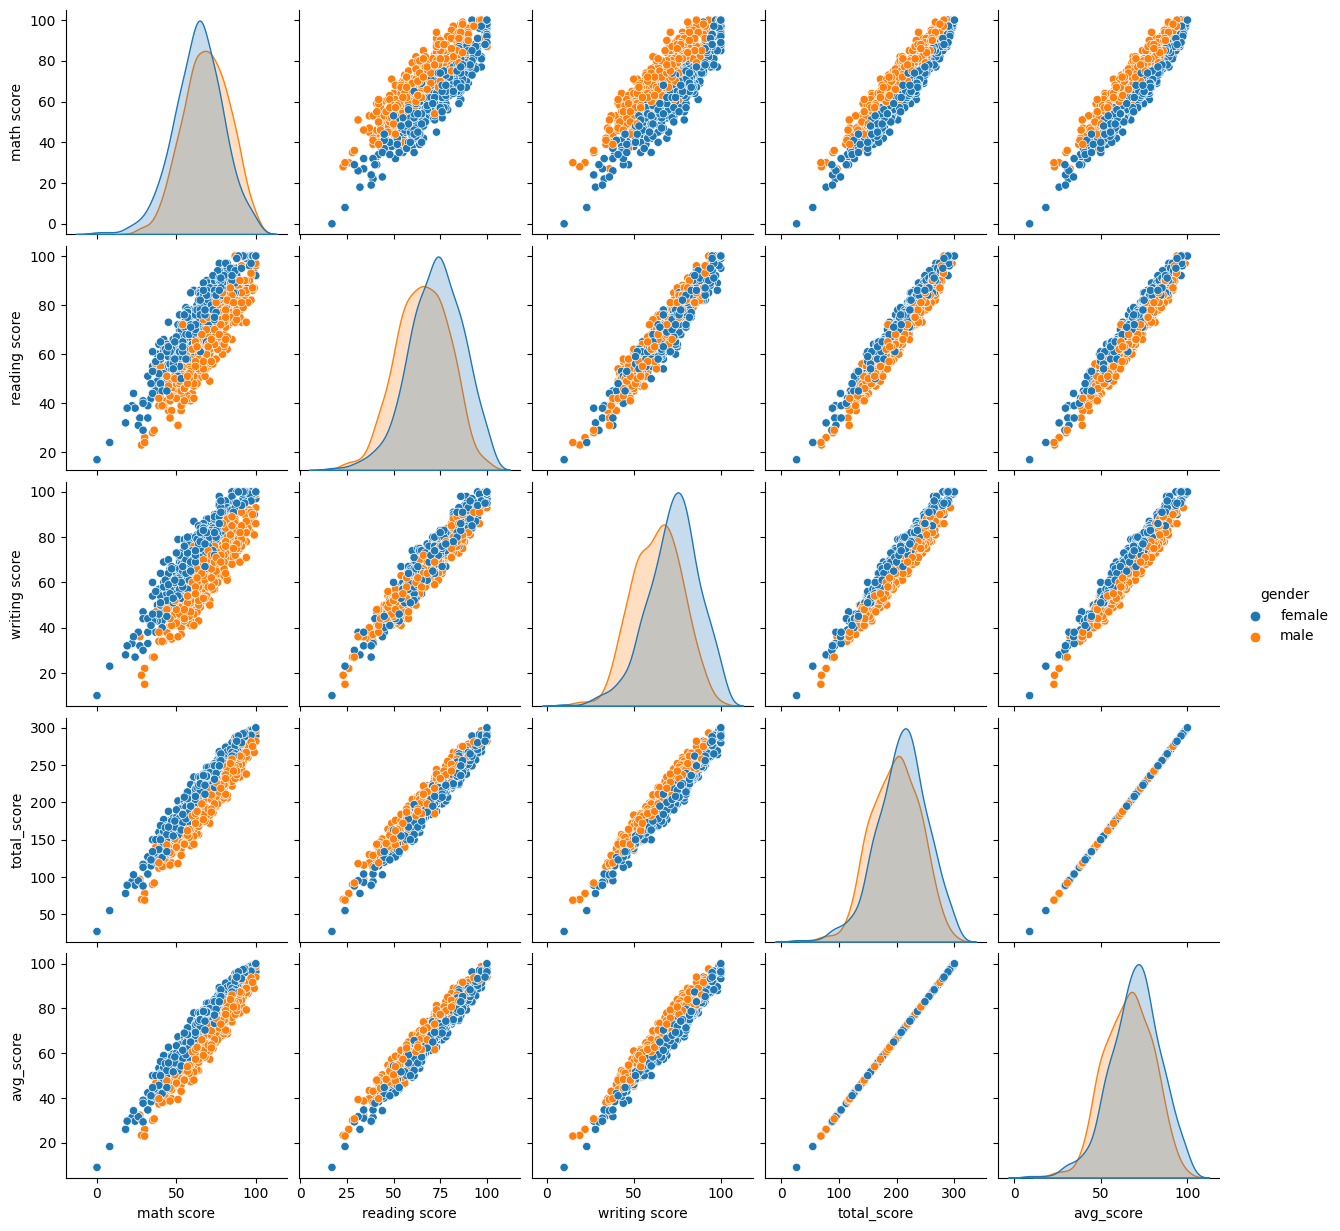

In [29]:
sns.pairplot(dataset,hue = 'gender')
plt.show()

In [30]:
dataset.to_csv('data.csv', index=False)